# MEDICAL CLAIM DATA ANALYSIS

## INTRODUCTION

In today's healthcare landscape, **cost reduction is a critical objective for health insurance companies** striving to provide affordable coverage while maintaining high-quality care. As the demand for healthcare services continues to rise, it becomes increasingly important to identify areas where costs can be minimized without compromising patient outcomes. To address this challenge, we embarked on an in-depth analysis of a historical medical claims dataset provided by RSSB(Rwanda Social Security Board). This dataset contains information on individual members, including their diagnoses, procedures performed, medications prescribed, and associated costs for each claim. By leveraging data analytics techniques, the aim is to uncover actionable insights that can help RSSB identify opportunities for cost reduction and optimize resource allocation effectively. In this report, I present findings and recommendations based on my analysis of the medical claims data, highlighting key areas where cost-saving measures can be implemented to drive greater efficiency and affordability in healthcare delivery.

## Objectives

The primary objective of this analysis is to discern actionable insights from comprehensive health insurance data, thereby empowering institution to make informed decisions aimed at mitigating expenses without comprimising the quality of coverage. Specifically, the report seeks to achieve the following objectives:

   * Analyze historical expenditure patterns to discern trends and anomalies.
   * Identify key drivers of healthcare costs and their respective impacts.
   * Expose potential areas for optimization and cost containment.
   * Provide actionable recommendations for expenses reduction based on data-driven insights.

## Scope

This analysis encompasses a broad spectrum of data sources, including but not limited to claims data, demographic information, provider networks, and medical utilization metrics. By harnessing the power of analysis techniques, the scope of this study extends to the entire continuum of healthcare expenditure.

In summary, this report represents a pivotal step towards a more efficient, equitable, and sustainable healthcare ecosystem in which data-driven decision-making fosters optimal outcomes for both insurers and insured parties.

The demography claim file used in this notebook is loaded as a DataFrame and named **df**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report # for froud
from sklearn.model_selection import train_test_split
# Import the split function from sklearn

In [17]:
df = pd.read_csv(r'C:\Users\HP\Documents\GIS\rssb_medical claims\demography_claim.csv')

The dataset has information regarding names, facility Name visited by the patient, medication code, medication name, admission date, discharged date and info about amount paid. the next cell displays few rows of the dataset.

In [3]:
df.head(2) #displaying the first two rows of our dataset

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291
1,51b5e30c-cf7c-463b-874c-35b935257049,Dorothy,Rice,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634


Next, let's see How many individuals are there in our dataset, average of paidAmount, billedAmount, paidAmount and the most frequent medicationName 

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,1937350.0,50.529090,28.862717,1.0,26.00,51.0,76.0,100.0
billedAmount,1937350.0,252618.540323,221338.377582,5.0,69620.00,189280.0,385875.0,1000000.0
verifiedAmount,1937350.0,126286.635662,147184.168518,0.0,20466.00,69984.0,179485.0,987357.0
paidAmount,1937350.0,126331.904661,147161.249009,1.0,20472.25,70021.0,179838.0,985496.0


These statistics provide an overview of the distribution and characteristics of the quantities, billed amounts, verified amounts, and paid amounts in the dataset. They can help in understanding the typical values and variability within each column.

For example; the maximum ever paid amount and billed amount are 985496.0 and 1000000.0 respectively while the less ever paid is one and five. The more we go deeper in this dataset, the more we will figure out.

## EDA (EXPLARATORY DATA ANALYSIS)

### MedicatonName field insights

Now, let's focus on the field of medicationName and see what is the most medication name which is more frequent

In [20]:
# Count the occurrences of each medication and display them
medication_counts = df['medicationName'].value_counts()

In [21]:
print(len(medication_counts)) #the number of different types of medication names

100


In [22]:
# Find the most frequent medicationName
most_frequent_medication = df['medicationName'].mode()[0]

print("The most frequent medication is:", most_frequent_medication)

The most frequent medication is:  OMEPRAZOLE 20MG  CAPSULE


Omeprazole is used to treat certain conditions where there is too much acid in the stomach. It is used to treat gastric and duodenal ulcers, erosive esophagitis, and gastroesophageal reflux disease (GERD). GERD is a condition where the acid in the stomach washes back up into the esophagus.

How much billedAmount, paidAmount and verified are on this type of medication name?

In [23]:
AmountPer_MedicationName= df.groupby('medicationName')[['paidAmount','billedAmount','verifiedAmount']].sum() 
# sum amount paid per facility name in demography claim file

In [24]:
sortedBilled = AmountPer_MedicationName.sort_values(by='billedAmount', ascending=False) 
# sorting billed amount in the demography claim file
sortedBilled.head(4)

,paidAmount,billedAmount,verifiedAmount
medicationName,,,
OMEPRAZOLE 20MG CAPSULE,2520203645,5002303170,2482099525
CONSULTATION GP WITH TRANSFER WORKING HOURS <25 MINUTES,2511474586,4994079525,2482604939
ADHESIVE TAPE 5 CM,2496421429,4988713855,2492292426
DICLOFENAC 25MG TABLET,2490328569,4987983955,2497655386


More focus should be on these three medicationName and understand why these particular medication are so frequent

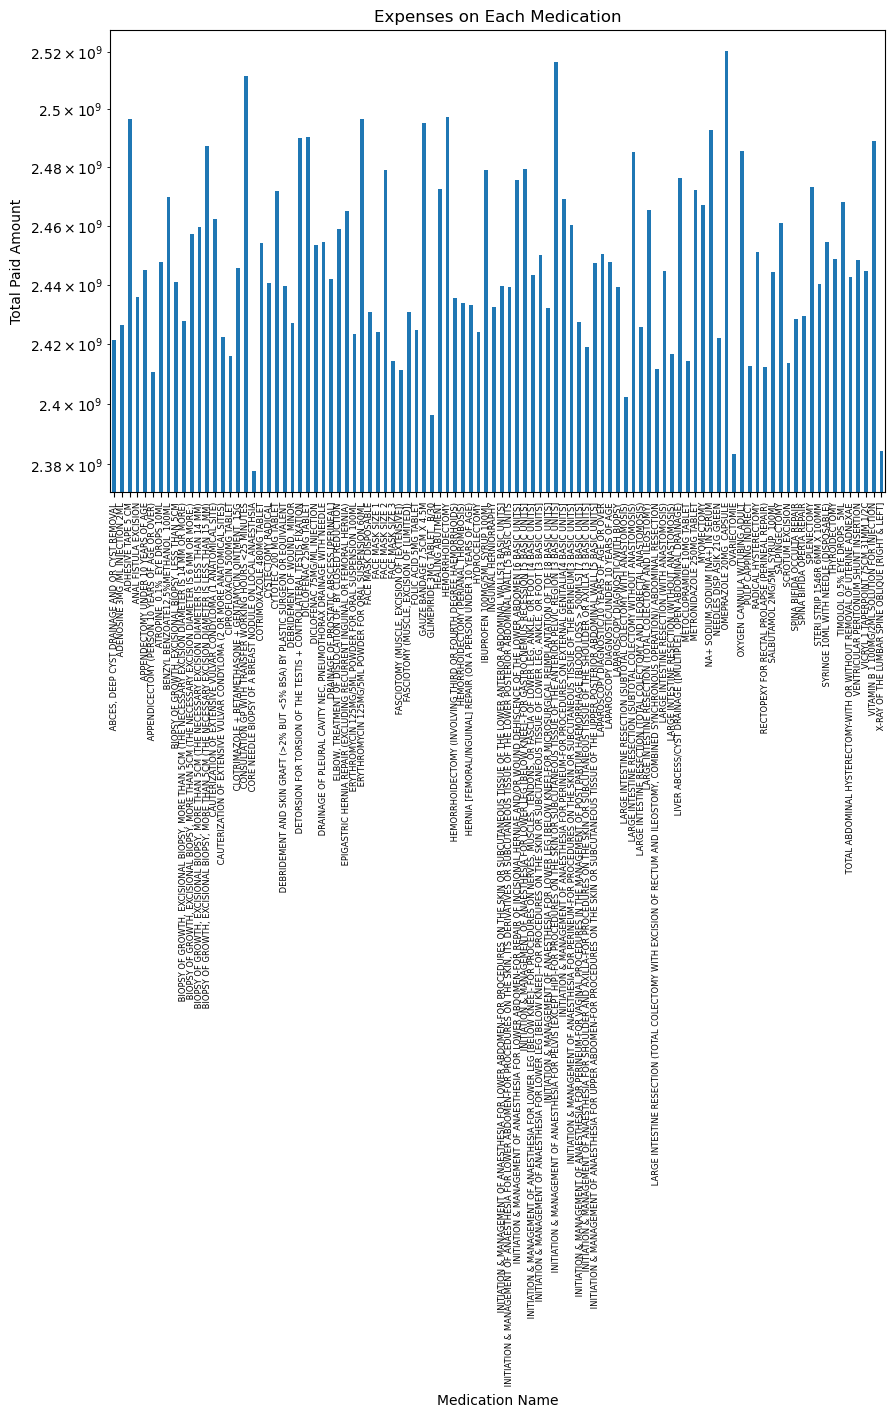

In [25]:
# Group the DataFrame by medicationName and calculate the total paid amount for each medication
medication_expenses = df.groupby('medicationName')['paidAmount'].sum()

# Plot the expenses on each medication name
plt.figure(figsize=(10, 6))
medication_expenses.plot(kind='bar')
plt.xlabel('Medication Name')
plt.ylabel('Total Paid Amount')
plt.title('Expenses on Each Medication')
plt.xticks(rotation=90, fontsize = 6)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Use a logarithmic scale for the y-axis to see variation in expenses
plt.show()

As the graphy above shows, three medicationNames stand out and drive a paidAmount around 2.5 Billions each namely:  OMEPRAZOLE 20MG  CAPSULE which ,CONSULTATION GP WITH TRANSFER WORKING HOURS <25 MINUTES and INITIATION AND MANAGEMENT OF ANESTHESIA FOR PELVIS [EXCEPT HIP] FOR PROCEDURES ON THE SKIN OR SUB CUTANEOUS TISSU OF THE ANTERIOR PELVIC REGION [8 BASIC UNITS]

The maximum of paid amount per medication name

In [26]:
medicationCost_df = df.groupby('medicationName')['paidAmount'].max()
# the max of paid amount for each medicationName
medicationCost_df.head()

medicationName
 ABCES, DEEP CYST DRAINAGE AND OR CYST REMOVAL    919821
 ADENOSINE 3MG /ML INJECTION 2ML                  905166
 ADHESIVE TAPE 5 CM                               958537
 ANAL FISTULA EXCISION                            952436
 APPENDECTOMY UNDER 10 YEARS OF AGE               918035
Name: paidAmount, dtype: int64

Let's see medicationName that are above the mean(average) cost in demograph claim. we are goingo to use the average/ mean that mentioned above.

In [27]:
AboveAveragePaidAmount = df[df['paidAmount']>126331] #Paid amount which are above average
AboveAveragePaidAmount.head(4) # displaying only four rows to save space

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291
3,026ec986-620b-41e5-9fc2-f9dc4d2247d2,Phyllis,Monahan,FEMALE,North Lusland With Bathdsor,RAMA,35641,OVARIECTOMIE,2023-05-21 00:24:43.016,2023-05-27 06:00:36.737,ICD-J01XB02001,CPT-42242000FQZ410,31,199330,48398,150932
4,17469904-7dd7-466d-9090-eba19a6f31dc,Daisy,Kuhic,FEMALE,Cetersrye,RAMA,35641,OVARIECTOMIE,2023-04-12 22:32:48.769,2023-09-09 15:52:50.782,ICD-J07BC01002,CPT-42242000FQZ359,100,888500,313717,574783
6,17469904-7dd7-466d-9090-eba19a6f31dc,Daisy,Kuhic,FEMALE,Cetersrye,RAMA,35729,RADICAL HYSTERECTOMY,2023-05-15 22:14:50.465,2024-01-24 16:46:25.606,ICD-J02AC01004,CPT-42242000FQZ423,67,661290,299710,361580


We notice that in the medicationName column there are word with a suffix " ..CTOMI.. or..CTOMY" which in simple terms means a surgery. We can conclude that surgeries are the most to drive the highest amount in expenses.

Since surgeries are costly, let's figure out the total amount spent on surgeries

In [28]:
# Filter the demography claim file to include only rows where the medicationName contains "ctom"
filtered_df = df[df['medicationName'].str.contains('ctom', case=False)]

len(filtered_df) 

368480

There are 368480 paid surgeries in our file

In [30]:
# Calculate the total of multiple columns (e.g., 'paidAmount' and 'quantity')
total_paid_amount = filtered_df[['paidAmount','billedAmount','verifiedAmount','quantity']].sum()

print("Expenses on surgeries")
print("-----------")

print("Total Paid Amount:", total_paid_amount['paidAmount'])
print("Total Paid Amount:", total_paid_amount['billedAmount'])
print("Total Paid Amount:", total_paid_amount['verifiedAmount'])
print("Total Quantity:", total_paid_amount['quantity'])


Expenses on surgeries
-----------
Total Paid Amount: 46403725772
Total Paid Amount: 93074516690
Total Paid Amount: 46670790918
Total Quantity: 18619553


OVERALL AMOUNTS

In [31]:
# Calculate the total of multiple columns (e.g., 'paidAmount' and 'quantity')
total_paid_amountt = df[['paidAmount','billedAmount','verifiedAmount','quantity']].sum()

print("The overall amounts")
print("-----------")

print("Total Paid Amount:", total_paid_amountt['paidAmount'])
print("Total Paid Amount:", total_paid_amountt['billedAmount'])
print("Total Paid Amount:", total_paid_amountt['verifiedAmount'])
print("Total Quantity:", total_paid_amountt['quantity'])

The overall amounts
-----------
Total Paid Amount: 244749115495
Total Paid Amount: 489410529095
Total Paid Amount: 244661413600
Total Quantity: 97892533


In [32]:
overall_total_paidAmount =244749115495
surgeries_total_paidAmount= 46403725772
Pctg_surgeries = (100/overall_total_paidAmount)*surgeries_total_paidAmount
print(f'The % of paid amount on surgeries is:', Pctg_surgeries)

The % of paid amount on surgeries is: 18.959711326494247


### FacilityNames/ Location

Number of Health facilities

In [33]:
hospitals = df['facilityName'].unique() # health facilities(hospitals)
number_= len(hospitals)
print(f'Number of facilities in dataset are {number_}')

Number of facilities in dataset are 100


MedicationNames also are 100, so don't confuse.

In [34]:
# 1. Distribution of Patients Across Facilities
facility_distribution = df['facilityName'].value_counts()
print("Distribution of Patients Across Facilities:")
print(facility_distribution)

# 2. Utilization Rate of Facilities
utilization_rate = df['facilityName'].value_counts(normalize=True) * 100
print("\nUtilization Rate of Facilities (%):")
print(utilization_rate)

# 4. Comparison of Services
# You can analyze the types of medications, procedures, or diagnoses associated with each facility.
# For example, you can calculate the average billed amount for each facility.
average_billed_amount_by_facility = df.groupby('facilityName')['billedAmount'].mean()
print("\nAverage Billed Amount by Facility:")
print(average_billed_amount_by_facility)


Distribution of Patients Across Facilities:
facilityName
Port Birmills      21500
Anglassron         21450
Prince Statenor    21250
Battelklouspa      21200
Sulmon Haven       21100
                   ...  
Kinggaspmouth      17750
Cape Montwent      17650
Nkporteasttown     17500
Grand Mountnell    17450
Bridlongrncast     16550
Name: count, Length: 100, dtype: int64

Utilization Rate of Facilities (%):
facilityName
Port Birmills      1.109763
Anglassron         1.107182
Prince Statenor    1.096859
Battelklouspa      1.094278
Sulmon Haven       1.089117
                     ...   
Kinggaspmouth      0.916200
Cape Montwent      0.911038
Nkporteasttown     0.903296
Grand Mountnell    0.900715
Bridlongrncast     0.854260
Name: proportion, Length: 100, dtype: float64

Average Billed Amount by Facility:
facilityName
Anglassron       252548.956876
Bamphills        255547.812073
Battelklouspa    249706.554481
Bea              254367.167925
Bridbelwey       251787.347514
                     

Distribution of Patients Across Facilities: Is used to determine the distribution of patients across different facilities to understand which facilities are utilized more frequently.

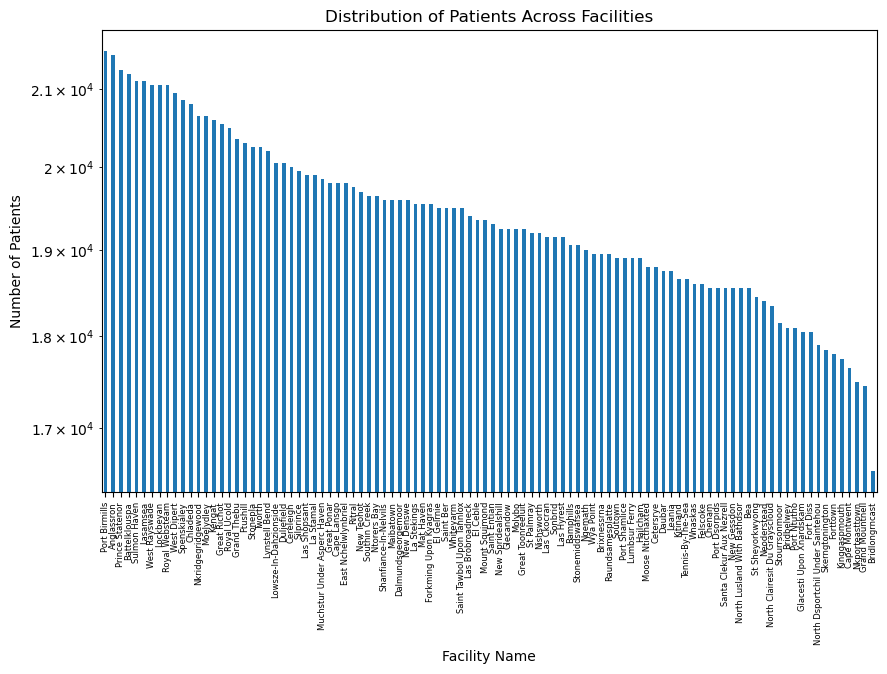

In [35]:
# Distribution of Patients Across Facilities
facility_distribution = df['facilityName'].value_counts()

plt.figure(figsize=(10, 6))
facility_distribution.plot(kind='bar')
plt.xlabel('Facility Name')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients Across Facilities')
plt.xticks(rotation=90, fontsize=6)
plt.yscale('log')
plt.show() # show the graph

From the above graph, we see that the most frequented facility Name is PORT BIRMILLS followed by ANGLASSRON where the last one is BRIDLONGMCAST.
If more data were available we could dig deep and see why the distribution is like that. 
Organize more field visits of less frequented to more sollicitated and see if they can learn and uplift their services.

COMPARISON OF SERVICES

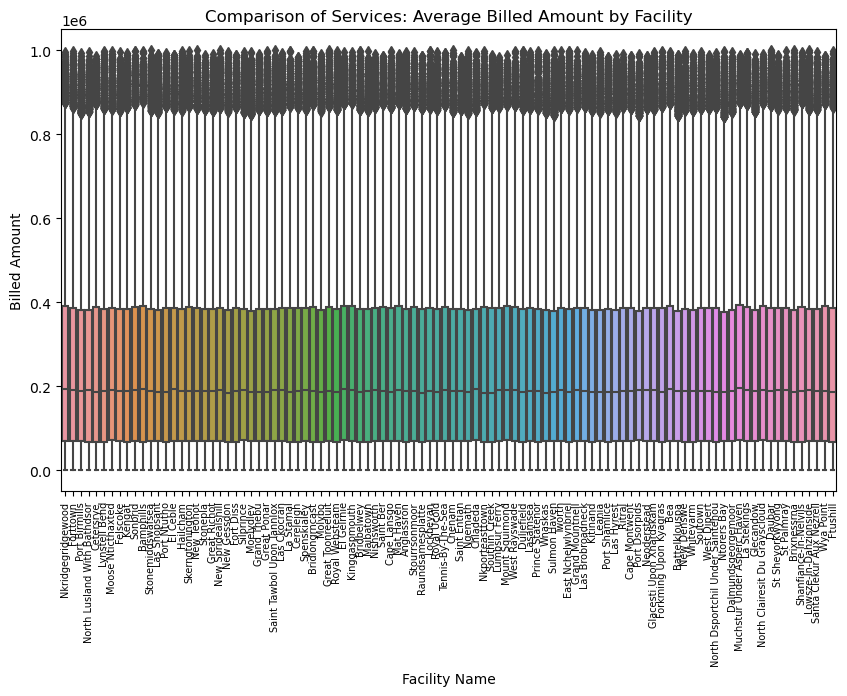

In [36]:
import seaborn as sns

# Comparison of Services: Average Billed Amount by Facility
plt.figure(figsize=(10, 6))
sns.boxplot(x='facilityName', y='billedAmount', data=df)
plt.xlabel('Facility Name')
plt.ylabel('Billed Amount')
plt.title('Comparison of Services: Average Billed Amount by Facility')
plt.xticks(rotation=90, fontsize=7)
plt.show()

DATES

The raw dataset and its date columns are not manipulable. The following snippets are written and run to get a column of date values.

In [38]:
df['new_admissionDate']= df['admissionDate'].str[:11] #first 11 characters of values of admissionDate
df['new_dischargeDate']= df['dischargeDate'].str[:11] #first 11 characters of values of dischargeDate

In [39]:
#Convert the date columns to datetime objects
df['new_admissionDate']= pd.to_datetime(df['new_admissionDate'])
df['new_dischargeDate']= pd.to_datetime(df['new_dischargeDate'])

#Calculate the difference between the dates

df['Datedifference'] = df['new_dischargeDate']- df['new_admissionDate']

Notice that in the table below, there are **new columns**: Datedifference which are days that the patient has spent at a health facility

In [40]:
h =df.head(3) # Displaying only 3 rows
h

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,new_admissionDate,new_dischargeDate,Datedifference
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291,2024-02-12,2024-03-23,40 days
1,51b5e30c-cf7c-463b-874c-35b935257049,Dorothy,Rice,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634,2023-11-10,2024-02-20,102 days
2,5819dcde-d9a9-4bba-9ce5-6eb92c0b9194,Brandy,Pollich,FEMALE,Port Birmills,RAMA,35641,OVARIECTOMIE,2023-07-16 00:22:32.556,2024-03-30 05:26:46.263,ICD-J04AM02002,CPT-42242000FQZ351,34,100980,73711,27269,2023-07-16,2024-03-30,258 days


A patient with most days spent at health facilities per scheme ( created using the newly created column Datedifference

In [41]:
days_df = df.groupby('scheme')['Datedifference'].max()
# the max of days spent for each scheme
days_df 

scheme
MUTUELLE   387 days
RAMA       387 days
Name: Datedifference, dtype: timedelta64[ns]

Days admitted at health facilities per scheme

In [42]:
days_dff = df.groupby('scheme')['Datedifference'].sum()
# the max of days spent for each scheme
days_dff 

scheme
MUTUELLE      48271 days 05:08:45.058498560
RAMA       -102074 days +05:08:45.058498560
Name: Datedifference, dtype: timedelta64[ns]

Let's carry a little investigation about which health facility likely to keep patient longer than others

In [43]:
# the max of days spent for each scheme (fN = facility name)
days_fN = df.groupby('facilityName')['Datedifference'].max()
# Sort the Series in descending order
days_fN_sorted = days_fN.sort_values(ascending=False)
# Display the sorted Series
days_fN_sorted

facilityName
Glacesti Upon Xnardskam       387 days
Chladeda                      387 days
North Lusland With Bathdsor   387 days
Royal Websteam                387 days
Hailcham                      387 days
                                ...   
Lockbeyan                     381 days
Saint Tawbol Upon Tannlox     381 days
Glecandow                     381 days
Stonepla                      379 days
Forkming Upon Kyagras         378 days
Name: Datedifference, Length: 100, dtype: timedelta64[ns]

There are only eleven days difference between the first and the last.These facility Names don't appear on the list of the best service provider, most visited list and yet keep patients at their facility. We can wonder which medicationName they give and so forth.

SCATTER PLOT GRAPH OF PATIENT RECEIVED OVER TIME

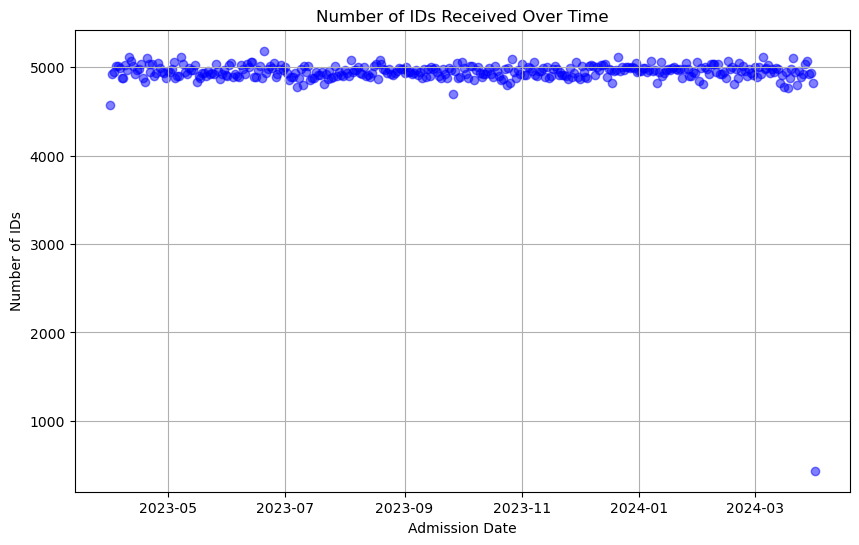

In [44]:
# Convert 'admission date' column to datetime type
df['new_admissionDate'] = pd.to_datetime(df['new_admissionDate'])

# Group by 'admission date' and count unique 'patientid's for each date
ids_received = df.groupby('new_admissionDate')['id'].nunique()

# Create a scatter plot of 'admission date' vs number of unique 'patientid's
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(ids_received.index, ids_received.values, color='blue', alpha=0.5)  # Plot admission date vs number of IDs
plt.title('Number of IDs Received Over Time')  # Set the title of the plot
plt.xlabel('Admission Date')  # Set the label for the x-axis
plt.ylabel('Number of IDs')  # Set the label for the y-axis
plt.grid(True)  # Enable grid lines
plt.show()  # Display the plot

There are around 5000 patients received everyday at all health facilities

### Schemes

In [52]:
# Create new DataFrame based on a condition
RAMA_insur_demogr = df[df['scheme'] == 'RAMA'] # number of people using RAMA in demography claims
MUTUELLE_insur_demogr = df[df['scheme'] == 'MUTUELLE'] # number of people using MUTUELLE in demography claims

# Displaying the newly created DataFrame
num=len(RAMA_insur_demogr)
numb=len(MUTUELLE_insur_demogr)
print(f'there are {num} people using RAMA')
print(f'there are {numb} people using MUTUELLE')

there are 968311 people using RAMA
there are 969039 people using MUTUELLE


The figure below illustrate amount per scheme

In [53]:
title_scheme = df.groupby('scheme')[['quantity','paidAmount','billedAmount','verifiedAmount']].sum() #group and sum the data by the number of values for each ‘scheme’
print(title_scheme) #demography claim only

          quantity    paidAmount  billedAmount  verifiedAmount
scheme                                                        
MUTUELLE  48984580  122418706006  245111606075    122692900069
RAMA      48907953  122330409489  244298923020    121968513531


### Fraud

In [68]:
# Calculate ratio of paid amount to billed amount
ratioo = df['paid_to_billed_ratio'] = df['paidAmount'] / df['billedAmount']
df['paid_to_billed_ratio'].sort_values() #sorting the ration of paid amount/billed amount

105445     0.000002
353123     0.000005
806207     0.000005
1806915    0.000005
607798     0.000008
             ...   
1381316    1.000000
1499243    1.000000
777924     1.000000
1458312    1.000000
378344     1.000000
Name: paid_to_billed_ratio, Length: 1937350, dtype: float64

INTERPRETATION of RATION

If **the highest ration is 1**: this means that no payments has exceeded billed amount.

If **the ration is less than one**: this suggests that the amount paid is less than the billed amount.

This could signal challenges with reimbursment rates negotiated with insurers, resulting in underpayment relative to billed charges. It may also indicate denials or delays in payment from insurers, leading to lower collections.

**Ideal ratio: Is when the ration is close to 1**, indicating the amount paid aligns closely with the initially billed charges. This suggests efficient billing practices, accurate coding, effective negociation with insurers, and timely reimbursment, resulting in optimal revenue realization.

After understanding how ratio is applied to this health dataset, let's pin point best and worst health care (facilityName) service providers that we came accross through above graphs and see if their service is related to the ratio. 

In [71]:
# Create new DataFrame based on a condition
Anglassron = df[df['facilityName'] == 'Anglassron']
# Displaying the newly created DataFrame
Anglassron_amount = Anglassron.groupby('facilityName')[['quantity','paidAmount','billedAmount','verifiedAmount']].sum() #group and sum the data by the number of values for each ‘scheme’
print(Anglassron_amount) #demography claim only

              quantity  paidAmount  billedAmount  verifiedAmount
facilityName                                                    
Anglassron     1090700  2709566138    5417175125      2707608987


In [73]:
Anglassron_ration= 2709566138 / 5417175125
Anglassron_ration

0.5001806431354755

The **Anglassron** ration can be interpreted like this: the billed amount is the **double** of the paid amount and the facility still get more patients and ranked as the second service provider.

Let's find the ratio of Bridlongmcast

In [80]:
Bridlongrncast = df[df['facilityName'] == 'Bridlongrncast']
Bridlongrncast_amount = Bridlongrncast.groupby('facilityName')[['quantity','paidAmount','billedAmount','verifiedAmount']].sum()
print(Bridlongrncast_amount)

                quantity  paidAmount  billedAmount  verifiedAmount
facilityName                                                      
Bridlongrncast    835939  2093798779    4197671600      2103872821


In [81]:
Bridlongrncast_ration= 2093798779 /4197671600 
Bridlongrncast_ration

0.49880004405299355

According to ration of **Bridlongrncast** facility, it looks like the ratio is the same as the second service provider. What is billed is divided by two.

## CORRELATION

After doing the EDA Kung fu, there are many questions we can ask ourselves for further analysis. The one that came to my mind is: Is there a relationship between the billed amount and number of patients?
    Using python as a tool and statistics, we can dive and see what we can come up with.

Time to prepare a proper DataFrame that will help us to fetch as much information as possible. 
Grouping number of patients and billedAmount per facility name and later pick only two columns as x,y (total_billed_amount and patients)
and form a new dataframe that is going to be use for regression analysis.

In [85]:
# Group by 'facilityName' and calculate the number of unique IDs and the total billed amount
facility_summary = df.groupby('facilityName').agg(
    patients=('id', 'nunique'),            # Count the number of unique IDs
    total_billed_amount=('billedAmount', 'sum')  # Sum the billed amounts
).reset_index()

# Display the summary
facility_summary.head()

,facilityName,patients,total_billed_amount
0,Anglassron,429,5417175125
1,Bamphills,381,4868185820
2,Battelklouspa,424,5293778955
3,Bea,371,4718510965
4,Bridbelwey,362,4557350990


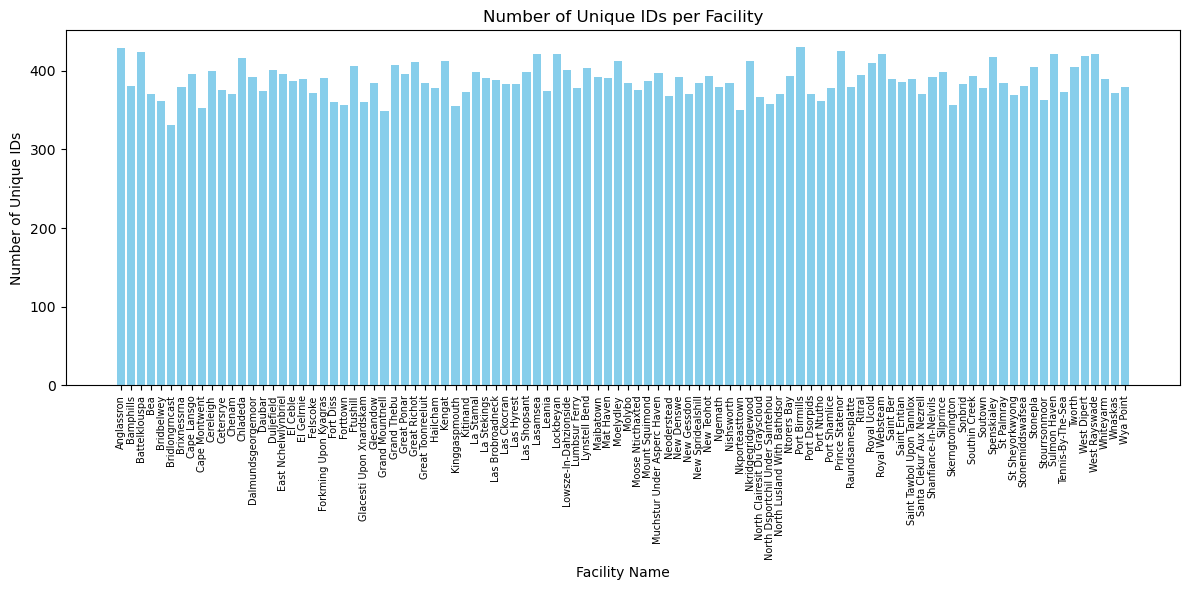

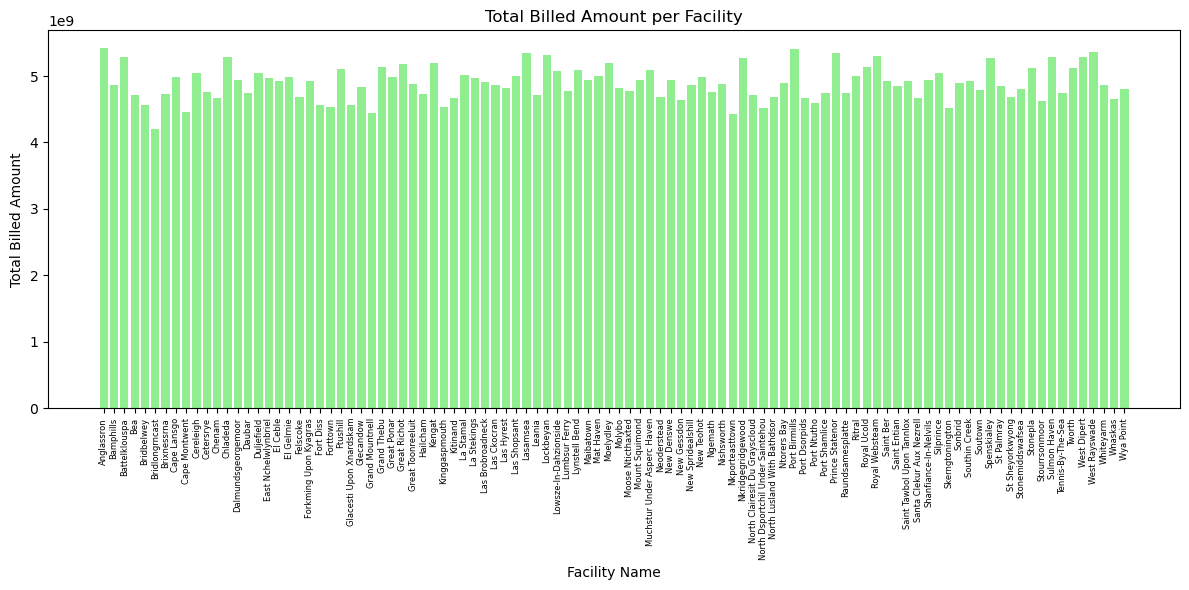

In [101]:
# Plot the number of unique IDs per facility
plt.figure(figsize=(12, 6))
plt.bar(facility_summary['facilityName'], facility_summary['patients'], color='skyblue')
plt.xlabel('Facility Name')
plt.ylabel('Number of Unique IDs')
plt.title('Number of Unique IDs per Facility')
plt.xticks(rotation=90, fontsize =7)
plt.tight_layout()
plt.show()

# Plot the total billed amount per facility
plt.figure(figsize=(12, 6))
plt.bar(facility_summary['facilityName'], facility_summary['total_billed_amount'], color='lightgreen')
plt.xlabel('Facility Name')
plt.ylabel('Total Billed Amount')
plt.title('Total Billed Amount per Facility')
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()

In [87]:
len(facility_summary)

100

There are 100 facilities, for us this is going to easy our life because we will not need to do sampling due to number 100 which is small enough.

In [125]:
df_b= facility_summary[['patients','total_billed_amount']]
df_b.head()

,patients,total_billed_amount
0,429,5417175125
1,381,4868185820
2,424,5293778955
3,371,4718510965
4,362,4557350990


In [115]:
def dataframe_to_numpy(df_b):
    """
    Convert a pandas DataFrame to a Numpy array.
    
    Parameters:
    -df: pandas DataFrame(demography claim)
    
    Returns:
    -np_array: Numpy array
    """
    np_array = df_b.values
    return np_array

#Convert DataFrame to Numpy array
numpy_array = dataframe_to_numpy(df_b)
numpy_array

array([[       429, 5417175125],
       [       381, 4868185820],
       [       424, 5293778955],
       [       371, 4718510965],
       [       362, 4557350990],
       [       331, 4197671600],
       [       379, 4731328180],
       [       396, 4992638205],
       [       353, 4458158220],
       [       400, 5050942580],
       [       376, 4754086460],
       [       371, 4662165690],
       [       416, 5291487195],
       [       392, 4937946285],
       [       375, 4745132130],
       [       401, 5041198700],
       [       396, 4972142130],
       [       387, 4927405635],
       [       390, 4989340875],
       [       372, 4684801315],
       [       391, 4918486505],
       [       361, 4561277125],
       [       356, 4538664515],
       [       406, 5106232620],
       [       361, 4562368705],
       [       385, 4832819135],
       [       349, 4442432455],
       [       407, 5130276715],
       [       396, 4985116280],
       [       411, 5180974190],
       [  

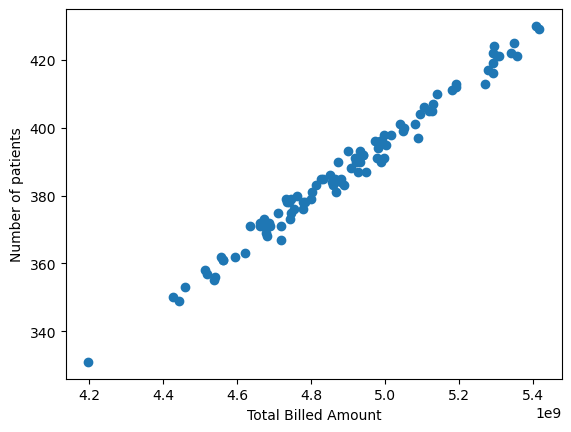

In [116]:
# Plot the original dataset with 'X' as billed amount and 'Y' as patient exchange rate using a scatter plot
plt.scatter(df_b['total_billed_amount'], df_b['patients'])
plt.ylabel("Number of patients")
plt.xlabel("Total Billed Amount")
plt.show()

From the plot above, we can see that there possibly exists a linear relationship between the two variables: **Total billed amount** and **Patients**, due to the linear trend of the data.

We would like to be able to fit a line to this data such that we can make predictions of Y (number of patients) for new values of billed amount. We would like to calculate values for the slope, $m$ and the y-intercept, $c$ such that the line represented by $y = mx + c$ lies as close as possible to the points shown in the scatter plot above.

In [127]:
# Rename columns to 'Y' for the dependent variable and 'X' for the independent variable(billed amount)
df_b.columns = ['Y', 'X'] # Rename the columns of the dataframe to 'Y' and 'X'

In [128]:
# Extract values of X and Y as numpy arrays for mathematical operations
X = df_b.X.values
Y = df_b.Y.values

# Calculate mean of X and Y
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate the slope (m) of the regression line using the least squares method
m = sum((X - x_bar) * (Y - y_bar)) / sum((X - x_bar) ** 2)

# Calculate the intercept (c) of the regression line
c = y_bar - m * x_bar

# Output the calculated slope and intercept
print("Slope = ", m)
print("Intercept = ", c)

Slope =  7.974238358948193e-08
Intercept =  -2.7976214382479156


Now we'll plot the **line** we've just calculated the coefficients for.

In [129]:
print(f'linear regression equ: y={m}*x + {c}')

linear regression equ: y=7.974238358948193e-08*x + -2.7976214382479156


There is a strong positive correlation between number of patients and the billed amount

As we have the regression equation in front of us; let us do some prediction: 
    In case of let's say 1000000 patients at a given health facility what will be the billed amount?
    we can answer this question using the equation we just created by remplacing x by 1000000 patients and we get Y (billed amount =independant variable)

In [133]:
y =(7.974238358948193e-08*1000000)+ -2.7976214382479156
print(f'the predicted number of patients for 1000000 billed amount will be:', y)

the predicted number of patients for 1000000 billed amount will be: -2.7178790546584337


This means that in case of zero patients the billedAmount will be negative.

In [134]:
-2.7976214382479156/7.974238358948193e-08 # in case Y(patient) is zero, what will X look like?

-35083243.21793817

In [135]:
jj = (1+2.7976214382479156)/7.974238358948193e-08
print(f'According to this regression equation, a health facility start to get 1 billed amount when number of patients is:', jj)

According to this regression equation, a health facility start to get 1 billed amount when number of patients is: 47623625.822351575


The regression is giving results of a dependant variable which don't make sense at all. Now let's do an little investigation on the billedAmount column and verify if the field contains negative values.

In [132]:
def check_negative_values(df, billedAmount):
    return (df[billedAmount]< 0).any()

result = check_negative_values(df, 'billedAmount')
print(f'The fact that there are negative values is:', result) #

The fact that there are negative values is: False


Let's continue until we figure out why our regression is not giving realistic results by testing its performance.

**Let me stop by here now. In the next repository we will try to figure out why. Is it because of aggregated data?**